<a href="https://colab.research.google.com/github/JoshRome/ai_course/blob/master/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5: Summary of Learned Concepts. 

#1. General Concepts:

**What is artifical intelligence ?**


Artiificial Intelligence (AI) is a field in computer science dedicated to developing algorithms that mimicks human behavior. This includes image recognition, pattern recognition, and desicion making.

**What is machine learning ?**

Machine Learning (ML) is a subset of AI that is a "field of study that gives computers the ability to learn without being explicitly programmed." Essentially ML will take algorithms/programs and will perform tasks that will improve its performance per process, giving it a sudo "learning" aspect without being excplicty given.  


**What is Deep Learning ?**



Deep Learning is a subset of machine learning that focuses on the use of neural networks to train and learn different types of data on with the use of multiple layers, with each consisting of nodes of various weights that act like neurons.  

# 2. Basic Concepts:  

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

**What is Linear Regression ?**

Linear Regression is an algorithm which focuses on prediciting linear relationships for sets of data. Essentially, it wil fit a line to said dataset 

(assuming the data set is two dimensional. For three dimensional, it will be a plane, and so on).


This line/plane/hyperplane can be used to show a regressive relationship or act as a decision boundary between two classes for classification problems. 

By convention in machine learning, we have the following equation to represent for a model:

$$\hat y = b + \Sigma_{i = 1}^n w_ix_i$$
Where 
      
      y = desired output
      b = bias
      wi = the weight of feature i (slope)
      xi - a known input.
The code below will demonstrate a linear regression with a set of randomly inputed data:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'color'


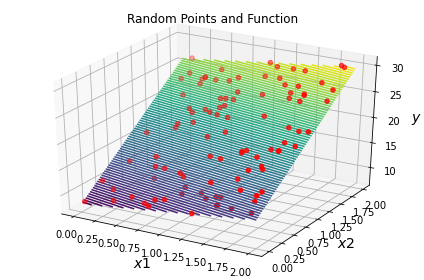

In [0]:
def funct(x1, x2):
  return 8 + 2 * x1 + 9 * x2

# We will create random points at (x1, x2, y)
m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 2 * np.random.rand(m, 1)
y = funct(x1, x2) + np.random.rand(m, 1)

# We shall plot the randomly generated set of points and the function:
x1_dim = np.linspace(0, 2, 30)
x2_dim = np.linspace(0, 2, 30)
X1, X2 = np.meshgrid(x1_dim, x2_dim)
Y = funct(X1, X2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(X1, X2, Y, 100 ,color='black')

ax.scatter3D(x1, x2, y, color='red')

ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$y$')
ax.set_title('Random Points and Function')

plt.tight_layout()

**What is a Gradient and Gradient Decent ?**

 The ***gradient*** is a set of partial derivatives within a dataset which encapulates the ascension/descension of a multivariate function. Since the gradient is a linear function, it can be utilized in linear and logistic regression. As well the gradient simply measures the change in all weights with regard to the change in error. 
 
 An easier way for me to think about gradients as slopes of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. In mathematical terms, a gradient is a partial derivative with respect to its inputs.

***Gradient descent*** is an optimization algorithm that's used when training a machine learning model. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum.
Gradient descent is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible. 

**Types of Gradient Descent**


*   Stochastic Gradient Descent: Gradient descent is performed where each batch (non-overlapping subsets of the training set) is a single data point.

*   Full Batch Gradient Descent: Gradient descent is performed where there is only one batch, the entire training set.

*   Mini-batch Gradient Descent: A compromise between the previous two, this will perform on batches of size n.

The code below will show code snippets of gradient decent with linear regression from Dr. Wocjans ([notebook ](https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-)):

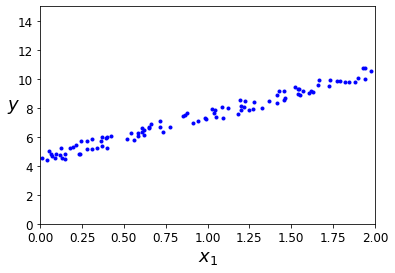

(100, 1)


In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

print(X.shape)

(2, 1)
(100, 1)
(100, 1)
(2, 1)


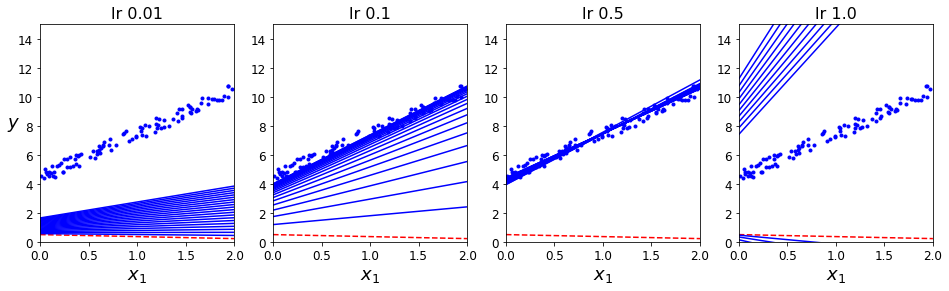

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1)

# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

y_predict = X_new_b.dot(weight)
y_predict

def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.subplot(144); plot_gradient_descent(initial_weight, 1.0)
plt.show()

**Linear regression using stochastic gradient descent**

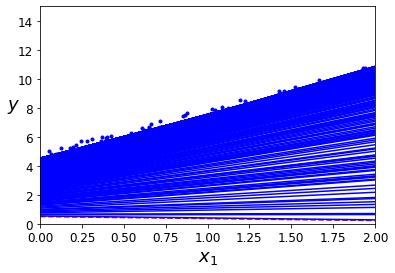

In [0]:
weight = initial_weight
weight_path_sgd = []

# plot training data
plt.plot(X, y, "b.")
# plot initial prediction
y_predict = X_new_b.dot(weight)                    
plt.plot(X_new, y_predict, "r--")        

weight_path_sgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(m):           
        xi = X_b_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradient = xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_sgd.append(weight)
        
        y_predict = X_new_b.dot(weight)                    
        plt.plot(X_new, y_predict, "b-")        
    
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                              
plt.show()  

**Linear regression using mini-batch gradient descent**


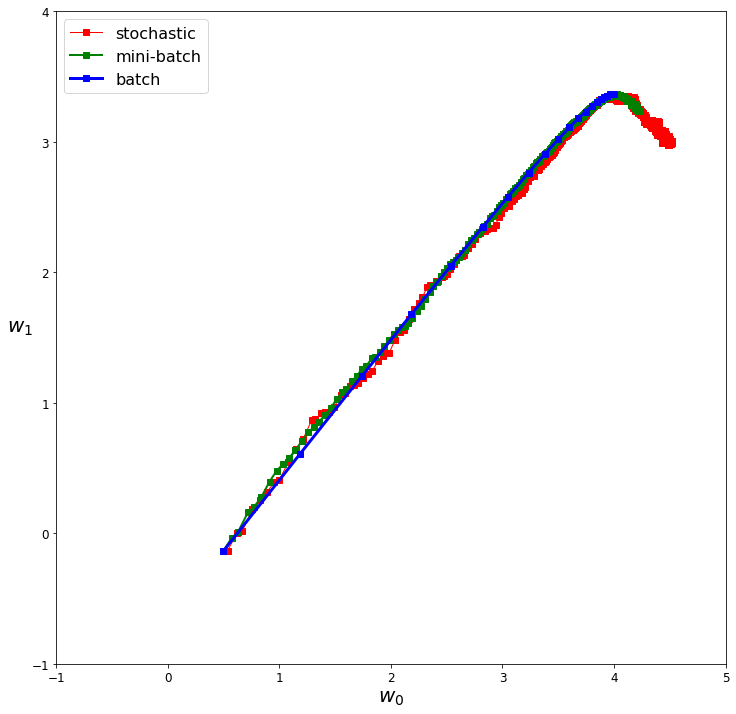

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_bgd = np.array(weight_path_bgd)
weight_path_sgd = np.array(weight_path_sgd)
weight_path_mgd = np.array(weight_path_mgd)

plt.figure(figsize=(12,12))
plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

**What is Logic Regression ?**

Logic regression is used for classifcation problems, where in a sense is similar to linear regression where both have the goal of estimating the values for the parameters/coefficients. Unlike linear regression, the prediction for the output is transformed using a non-linear function called the logistic function where it utilizes the sigmoid function: 

$$\frac{1}{1+e^x}$$

The predictions made by logistic regression above can also be used as the probability of a given data instance belonging to class 0 or class 1. Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities.

Below is code of a logistic model using keras:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


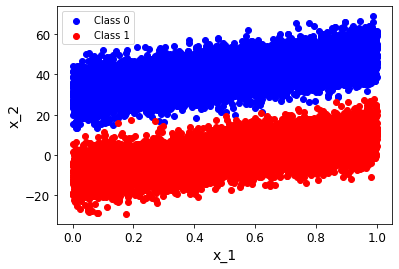

Epoch 1/250
400/400 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.7184 - val_loss: 0.4104 - val_accuracy: 0.7555
Epoch 2/250
400/400 [==============================] - 1s 1ms/step - loss: 0.3422 - accuracy: 0.8139 - val_loss: 0.2888 - val_accuracy: 0.8595
Epoch 3/250
400/400 [==============================] - 1s 1ms/step - loss: 0.2387 - accuracy: 0.9089 - val_loss: 0.2009 - val_accuracy: 0.9340
Epoch 4/250
400/400 [==============================] - 1s 1ms/step - loss: 0.1650 - accuracy: 0.9588 - val_loss: 0.1395 - val_accuracy: 0.9747
Epoch 5/250
400/400 [==============================] - 1s 1ms/step - loss: 0.1149 - accuracy: 0.9822 - val_loss: 0.0980 - val_accuracy: 0.9865
Epoch 6/250
400/400 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 0.9912 - val_loss: 0.0705 - val_accuracy: 0.9918
Epoch 7/250
400/400 [==============================] - 1s 1ms/step - loss: 0.0585 - accuracy: 0.9948 - val_loss: 0.0514 - val_accuracy: 0.9950

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
def logistic_model():
  model = tf.keras.models.Sequential()

  # Add a layer to the network
  model.add(tf.keras.layers.Dense(1, activation='sigmoid', input_shape = (2, )))

  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

def get_random_data(w, b, mu, sigma, m):
  '''
  Generates random feature data that uses the 1st feature as added noise

  @returns: data, lables as a np.array
  '''
  ## We use flatten() to accuratly represent normal distribution and it
  ## doesnt break the code with out of bound values !!
   
  # Gets random data with a 50-50 chance of either
  labels = np.zeros(shape = (m, 1))
  labels[:, 0]= np.random.choice([0,1], size = (m,1), p = [.5, .5]).flatten()

  # Grabs data uniformly
  data = np.zeros( shape = (m, 2))
  data[:, 0] = np.random.uniform(size = (m,1)).flatten()

  # Norm Dist 1d array
  n = np.random.normal(mu, sigma, (m, 1)).flatten()

  # Create second feature with added noise
  data[:, 1] = w* data[:,0] + b + np.power(-1, labels).flatten() * n

  return data, labels

def display_random_data( data, labels ):

  # Reshape the data
  idx = labels.flatten()

  # Seperate the plots blue and red
  zero_data = data[idx == 0,:]
  plt.scatter(zero_data[:,0], zero_data[:,1], c = 'blue', label= 'Class 0')

  one_data = data[idx == 1,:]
  plt.scatter(one_data[:,0], one_data[:, 1], c = 'red', label = 'Class 1')

  # Labels
  plt.legend()
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.show()

m = 20000
w = 20
b = 10
mu = 20
sigma = 6

data, labels = get_random_data(w, b, mu, sigma, m)

display_random_data(data, labels)

df = pd.DataFrame(data)
y = pd.DataFrame(labels)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

epochs = 250

batch_size = 40

# Creates the network
log_network = logistic_model()

# Fits the model
history = log_network.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# 3. Building a Model

1.   **Neural network**: A neural network is a network that consists of various layers, a data structure which accepts one or more tensors as an input, and outputs one or several tensors as an output. These layers typically contain weights, and use these along with gradient descent to process the input, and together all these layers contain the knowledge of the network.

2.   **Convolutional Neural Networks**: A convolutional neural network (CNN) is a specific deep learning model that, over time, aabstracts information about the input tensor across the layers in the network. The convolution operator for a convolution module takes a kernel and passes it over the input to extract features from it. For example, here is a convolution implementation for 2D tensors (matrices)

```
                              Input X
                                |
                                V
+-----------+       +-------------------------+
|  Weights  |  -->  |          Layer          |
+-----------+       |  (data transformation)  |
                    +-------------------------+
                                |
                                V
+-----------+       +-------------------------+
|  Weights  |  -->  |          Layer          |
+-----------+       |  (data transformation)  |
      ^             +-------------------------+                         
      | update                  |
      | weight                  V
      |                 +---------------+              +----------------+
      |                 |  Predictions  |              |  True targets  |
      |                 |      ^y       |              |       y        |
      |                 +---------------+              +----------------+
      |                         |                             |
      |                         |     +-----------------+     |
      |                         +---->|  Loss function  |<----+
+-------------+                       +-----------------+
|  Optimizer  |                                |
+-------------+                                |
      ^                                        V
      |                                +--------------+      
      +--------------------------------|  Loss score  |
                                       +--------------+


```
In this class we implemted a CNN with the following functions:

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.data
test_input = skimage.data.chelsea()
test_input = skimage.color.rgb2gray(test_input)
test_input.shape

(300, 451)

2D Convolutions With Numpy

(300, 451)

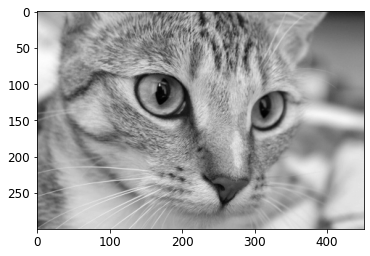

In [0]:
def conv2d (input_mat, kernel_mat, stride = 1):
  # Error handeling to ensure inputs are working as intended

  try:
    input_matrix = np.array(input_mat)
    a,b = input_matrix.shape
  except: 
    raise Exception ("ERROR: Input matrix can't be turned into a numpy array.")

  try:
    kernel_matrix = np.array(kernel_mat)
    c,d = kernel_matrix.shape
  except: 
    raise Exception ("ERROR: Kernel matrix can't be turned into a numpy array.")

  # Tests to see if the arrays are the same size for kernel, input can be anything.
  if (c != d): 
    raise Exception("ERROR: Matrix do not have the same dimensions.") 
  
  # Checks to see if inputs are empty.
  if (input_matrix.size == 0 or kernel_matrix.size == 0):
    raise Exception("ERROR: input or kernel are empty.")  
  
  # Checks to see if kernel is bigger input.
  if (a < c):
    raise Exception("ERROR: Kernel is larger than the input.")
  
  mirror = np.flip(kernel_matrix)
  
  # Creates an output_mat that has the same diementions. 
  output_size = np.ceil((a - c + 1) / stride).astype(int)
  output_mat = np.zeros(shape = (output_size, output_size))
  
  # Nested for-loop that creates an output_mat that takes the sum of the
  # multiplied kernel and input matrices (our 2D convolution).  
  for i in range(output_size):
    x = stride * i
    for j in range(output_size):
      y = stride * j
      output_mat[i , j] = np.sum(np.multiply( input_matrix[x:c+x, y:c+y], mirror))
  
  return output_mat

# We create two masks of numpy arrays for the image we are about to call.
maskX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
maskY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# We call cov2d with the image input and the kernels as our two masks for X & Y. 
outX = conv2d(test_input, maskX)
outY = conv2d(test_input, maskY)

sobel = np.zeros(outX.shape)
maxval = 0

# We calculate the magnitudes of our x and y test_inputs to make a aquare image.
for i in range(outX.shape[0]):
  for j in range(outX.shape[1]):
    sobel[i][j] = math.sqrt((outX[i][j]**2)+(outY[i][j]**2))
    if sobel[i][j] > maxval:
      maxval = sobel[i][j]

# We take the magnitude that is put into sobel and we normalize them.
for i in range(outX.shape[0]):
  for j in range(outX.shape[1]):
    sobel[i][j] = (sobel[i][j]/maxval)

plt.imshow(test_input, cmap='gray')
test_input.shape

(298, 298)

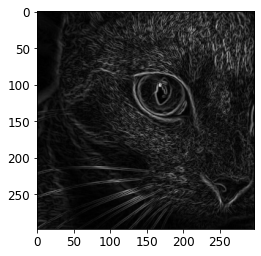

In [0]:
plt.imshow(sobel, cmap='gray')
sobel.shape

 2D Max Pooling

(298, 298)

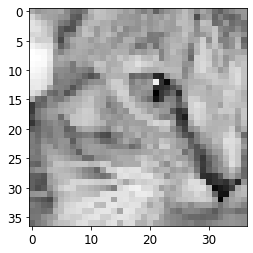

In [0]:
def maxpooling2d(input_mat, s):
  # Error handeling to ensure inputs are working as intended
  try:
    input_matrix = np.array(input_mat)
    a,b = input_matrix.shape
  except: 
    raise Exception ("ERROR: Input matrix can't be turned into a numpy array.")

  # We don't need to check the input since it can be anything.
   
  # Checks to see if inputs are empty.
  if (input_matrix.size == 0):
    raise Exception("ERROR: input is are empty.")  
  
  # Checks to see if kernel is bigger input.
  if (a < s):
    raise Exception("ERROR: Kernel is larger than the input.")
  
  # Creates an output_mat that has the same diementions. 
  output_size = np.ceil((a - s + 1) / s).astype(int)
  output_mat = np.zeros(shape = (output_size, output_size))

  # Nested loop that creates an output_mat with the max of the 2D input matrix
  # and the stride s. 
  for i in range(output_size):
    x = s * i
    for j in range(output_size):
      y = s * j
      output_mat[i , j] = np.max(input_matrix[x:s+x, y:s+y])
      
  return output_mat

maxpooltest = maxpooling2d(test_input, 8)
plt.imshow(maxpooltest, cmap='gray')
sobel.shape

#4. Compiling a Model

From what we have learned in this class, to compile we need an optimiser and a loss function. 


1.   **Loss Function**: Determines what quantity needs to be reduced. The network of the training will work to minimize said quantity. The lower the final result is, the more "successful" the model is. The loss functions we have covered are Cross Entropy(CE) and Mean Squared Error(MSE). 

\begin{equation*}
  \
    -\dfrac{1}{N} \sum_{i=1}^{N}(y_i *log(\dfrac{1}{1 + e^z})) - ((1-y_i) * log(1 - \dfrac{1}{1 + e^z}))
  \
\end{equation*}


2.   **Optimizer**: Determines how a network will update based on the loss function. It will pick a specific gradient descent which the network use to optimize a model. (aka compile the model.) 



#5. Train a model.

This topic is the main essence of machine learning, where we described that ML is supposed to follow a set of rules without specifically telling a program what to do while it still optimizes a data set to a desired output. We have 
several ways of doing this type of training through Epochs and Batch Sizes.



*  **Batch Sizes**: A Batch Size (Steps per Epoch) are  the amount of data points that are being used per epoch. The larger the batch size, the faster the training will go. This however comes with a drawback since the faster a program goes through an epoch the less accurate the outputs become. Therefore we trade in speed with accuracy in larger batch sizes which give us far more accurate data at the cost of performance. 

*   **Epochs**: An epoch is an iteration or a representation of the data that is given as input, wich is then used as input for the next epoch. Therefore, the more epochs in training, the more accurate the output will be.

To implement how we have trained models in class, I will demonstarte training a model using MobileNet with a pretrained convnet of the book Deep learning with Python by Francois Chollet: 



**Feature extraction**

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

We will use here the convolutional base of the MobileNet model to extract the features. We will feed these features to a densely connected classifier with dropout. We will fine-tune some layers

**Download the data**

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-25 00:25:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   178MB/s    in 0.4s    

2020-04-25 00:25:38 (178 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]




**Build network with MobileNet convolution base and custom densely connected layers**

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



from keras.applications import MobileNet

conv_base = MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.summary()



/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 


**Freeze the convolutional base** 
 
**Concatenate the convolutional base and densely connected layers**

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 75s 4s/step - loss: 0.2628 - acc: 0.9150 - val_loss: 0.3921 - val_acc: 0.9490
Epoch 2/10
20/20 [==============================] - 68s 3s/step - loss: 0.3591 - acc: 0.8600 - val_loss: 0.0501 - val_acc: 0.9360
Epoch 3/10
20/20 [==============================] - 68s 3s/step - loss: 0.3024 - acc: 0.8775 - val_loss: 0.0079 - val_acc: 0.9550
Epoch 4/10
20/20 [==============================] - 68s 3s/step - loss: 0.2445 - acc: 0.8875 - val_loss: 0.0531 - val_acc: 0.9560
Epoch 5/10
20/20 [==============================] - 67s 3s/step - loss: 0.2720 - acc: 0.8825 - val_loss: 0.0040 - val_acc: 0.9540
Epoch 6/10
20/20 [==============================] - 67s 3s/step - loss: 0.2277 - acc: 0.9100 - val_loss: 0.1356 - val_acc: 0.9590
Epoch 7/10
20/20 [==============================] - 68s 3s/step - loss: 0.1957 - acc: 0.9225 - val_loss: 0.0597 - val_acc: 0.9570
Epoch 

# 6: Fine Tuning
 In the class we have learned that with deep learning we can use a process called fine tuning, which essentially runs an already trained model against another data set. What this does it makes the model more precise in reading data for a desired output, which is the main idea of mechaine learning where we "teach" our model to be more tuned to reading our datasets. The way we actully fine tune our models is by adding in more layers, loss functions, optimizers or cr chaning what conv base you are using. 

 I wil continue using the trained data above and add in the finetuning I did for homework number 4 to demonstrate how the graphs will look afte fine tuning our model.    


**Display curves of loss and accuracy during training**

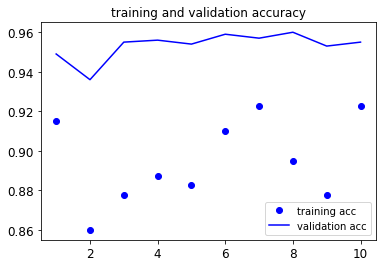

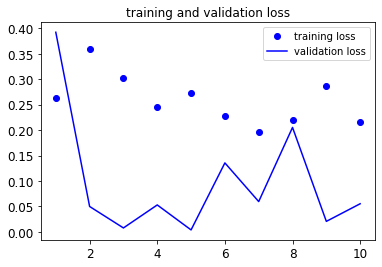

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

**Fine Tuning**

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv_pw_12':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [36]:
model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
30/30 [==============================] - 93s 3s/step - loss: 0.2036 - acc: 0.9200 - val_loss: 0.0489 - val_acc: 0.9610
Epoch 2/10
30/30 [==============================] - 86s 3s/step - loss: 0.1678 - acc: 0.9383 - val_loss: 0.1879 - val_acc: 0.9580
Epoch 3/10
30/30 [==============================] - 86s 3s/step - loss: 0.1913 - acc: 0.9317 - val_loss: 0.1713 - val_acc: 0.9590
Epoch 4/10
30/30 [==============================] - 87s 3s/step - loss: 0.2232 - acc: 0.9050 - val_loss: 0.0920 - val_acc: 0.9620
Epoch 5/10
30/30 [==============================] - 90s 3s/step - loss: 0.1948 - acc: 0.9283 - val_loss: 0.0936 - val_acc: 0.9600
Epoch 6/10
30/30 [==============================] - 87s 3s/step - loss: 0.1851 - acc: 0.9217 - val_loss: 0.2157 - val_acc: 0.9560
Epoch 7/10
30/30 [==============================] - 86s 3s/step - loss: 0.1610 - acc: 0.9267 - val_loss: 0.0035 - val_acc: 0.9610
Epoch 8/10
30/30 [==============================] - 87s 3s/step - loss: 0.1968 - acc: 0.92

Display learning curves during fine-tuning

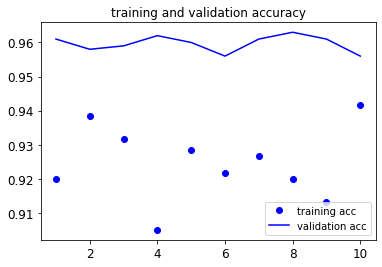

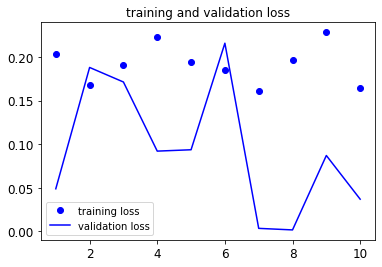

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()